In [1]:
# impor libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

In [2]:
# To center the images

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [68]:
# Load data into a pandas DataFrame
fashion_df = pd.read_csv('fashion_tweets_allf.csv')
fashion_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
0,Michelleferg79,NaN,NaN,4981,669,98487,2013-10-25 18:38:52,2020-10-04 17:40:05,174,RT @AnythingGoesL: #Win the 3-Step Anthology f...
1,GillybeansH,NaN,England,4637,238,15409,2009-05-10 13:18:12,2020-10-04 17:40:05,476,RT @So_Lippy: Enter our #October #Competition ...
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...
4,_Fanii10,NaN,NaN,25,36,32,2015-06-21 21:26:09,2020-10-04 17:39:57,1,RT @theregoesjared: Candy Battle 🍬🍭🍫\nStarburs...


In [69]:
# Find out total no of rows and columns
fashion_df.shape

(70000, 10)

In [70]:
# Count missing values
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        70000 non-null  object
 1   user_desc        61260 non-null  object
 2   location         46685 non-null  object
 3   following        70000 non-null  int64 
 4   followers        70000 non-null  int64 
 5   totaltweets      70000 non-null  int64 
 6   user_createdts   70000 non-null  object
 7   tweet_createdts  70000 non-null  object
 8   retweet_count    70000 non-null  int64 
 9   text             70000 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.3+ MB


In [71]:
# Check for duplicate tweets 

duplicate_tweets_fashion = fashion_df.duplicated(keep='first').sum()
duplicate_tweets_fashion

3293

In [72]:
# drop duplicates
fashion_df = fashion_df.drop_duplicates()
len(fashion_df)

66707

In [73]:
# Check for % of retweets
fashion_df['text'].apply(lambda x: 'RT' in x[:3]).mean()

0.4437615242778119

In [74]:
# Drop the retweets
fashion_df = fashion_df[~fashion_df.text.str.startswith('RT')]
len(fashion_df)

37110

In [75]:
fashion_df.head(5)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...


In [76]:
# defind a function to find all the hashtags in a tweet

def hashtag(text):
    return (set([str(i.lower()) for i in text.split() if i.startswith("#")]))

fashion_df['hashtags'] = fashion_df['text'].apply(hashtag)
fashion_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty}
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #directory, #fashion?, #seo, #fnzb}"
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashionphotography, #flannel, #baltimorephot..."


In [77]:
# Count the hashtags per each tweets
fashion_df['num_hashtags'] = fashion_df['hashtags'].apply(len)
fashion_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #directory, #fashion?, #seo, #fnzb}",5
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashionphotography, #flannel, #baltimorephot...",15


In [78]:
# find the number of search hashtags (we used thsese tags to pull the tweet) in a tweet
search_tags = ['#fashion', '#style',  '#design',  '#beauty',  '#fashiontrends',  '#fashionblogger', '#fashionstyle',  '#fashionweek',  '#fashionstylist',  '#fashionmodel' , '#fasionista' , '#model',  '#fashionlover',  '#womenfashion', '#menfashion']

def search_hashtags(tags):
    t = 0
    for i in search_tags:
        for j in tags:
            if i in j:
                t += 1
    return t

                
fashion_df['num_search_tags'] = fashion_df['hashtags'].apply(search_hashtags)
fashion_df.head()            

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #directory, #fashion?, #seo, #fnzb}",5,1
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashionphotography, #flannel, #baltimorephot...",15,3
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...,"{#style, #ootd, #outfit, #lookbook, #fashion, ...",6,2
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...,"{#design, #fiction, #environment}",3,1


In [79]:
# find the the number of tweets with no search hashtags
len(fashion_df[fashion_df.num_search_tags == 0])

49

In [81]:
# drop the tweets with no search hashtags

fashion_df = fashion_df[fashion_df.num_search_tags != 0]
len(fashion_df)


37061

In [83]:
def label_func(followers):
    if followers > 30000:
        return 1
    else:
        return 0
fashion_df['label'] = fashion_df['followers'].apply(label_func)
fashion_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #directory, #fashion?, #seo, #fnzb}",5,1,1
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashionphotography, #flannel, #baltimorephot...",15,3,0
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...,"{#style, #ootd, #outfit, #lookbook, #fashion, ...",6,2,0
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...,"{#design, #fiction, #environment}",3,1,0


In [84]:
followers_count = fashion_df['label'].value_counts().sort_index()
followers_count

0    36369
1      692
Name: label, dtype: int64

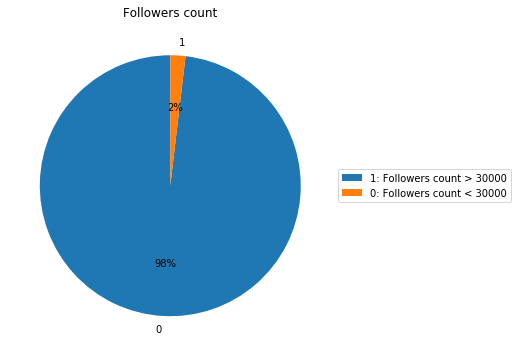

In [85]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
plt.pie(followers_count, labels=[0,1],startangle=90, autopct='%.0f%%')

ax.legend(["1: Followers count > 30000", "0: Followers count < 30000"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Followers count")

plt.show()

### Distribution of Word Count, % of caps, number of hashtags in different labels (followers count category)

In [87]:
# Distribution of tweet length in different labels (followers category)

fashion_df['tweet_length'] = fashion_df['text'].apply(lambda x: len(x.split())) # tweet length
fashion_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0,9
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #directory, #fashion?, #seo, #fnzb}",5,1,1,13


In [88]:
# user with higest number of tweets on fashion
user = fashion_df['user_name'].value_counts()
user.head(10)

voudaux            148
FitCasuallySKIN    141
DLentilse          122
Kada_soulayman     106
IAM__Network        99
MGDezigns           96
PrettyGemsLoved     89
PPerceptions        86
insoc_on_ebay       82
RetrouvBiz          78
Name: user_name, dtype: int64

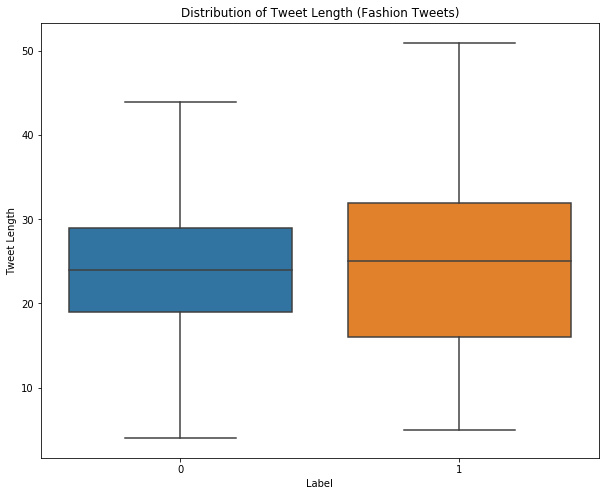

In [90]:
# tweet length distribution at different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'tweet_length', data = fashion_df, showfliers=False).set(xlabel= 'Label', ylabel='Tweet Length', title='Distribution of Tweet Length (Fashion Tweets)')
plt.show()

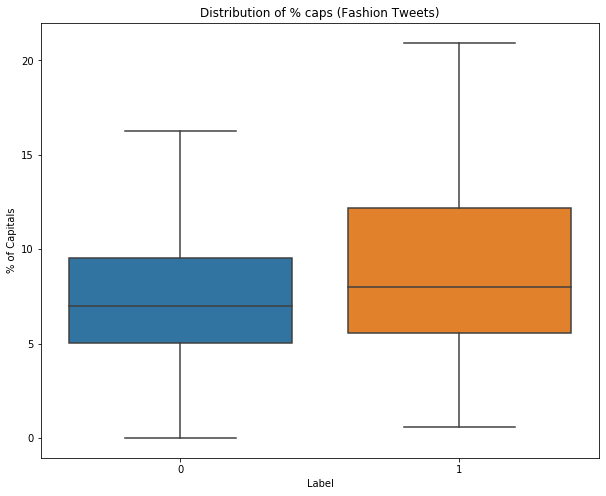

In [91]:
# define a function to get % of caps in a tweet
def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100

# Distribution of % of Caps in different followers count (labels)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(caps), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='% of Capitals', title='Distribution of % caps (Fashion Tweets)')
plt.show()

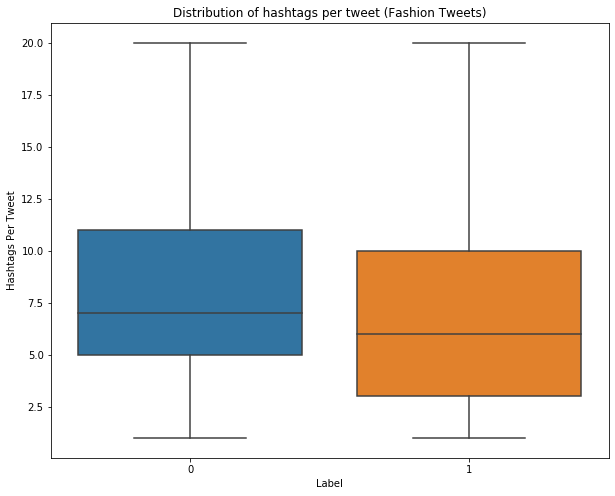

In [93]:
# Distribution of number of hashtags in different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'num_hashtags', data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Hashtags Per Tweet', title='Distribution of hashtags per tweet (Fashion Tweets)')
plt.show()

In [96]:
# import textstat library and set it for English language
import textstat
textstat.set_lang('en')


In [99]:
fashion_df['reading_level (ARI)'] = fashion_df['text'].apply(lambda x: textstat.automated_readability_index(x))
fashion_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,reading_level (ARI)
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0,9,18.7
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #directory, #fashion?, #seo, #fnzb}",5,1,1,13,19.1
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashionphotography, #flannel, #baltimorephot...",15,3,0,19,41.9
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...,"{#style, #ootd, #outfit, #lookbook, #fashion, ...",6,2,0,19,21.1
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...,"{#design, #fiction, #environment}",3,1,0,14,17.9


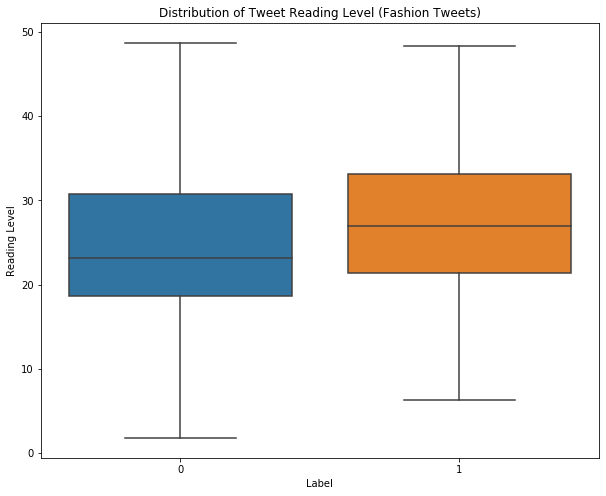

In [98]:
# Distribution of reading level in different labels (Automated Readability Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.automated_readability_index(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

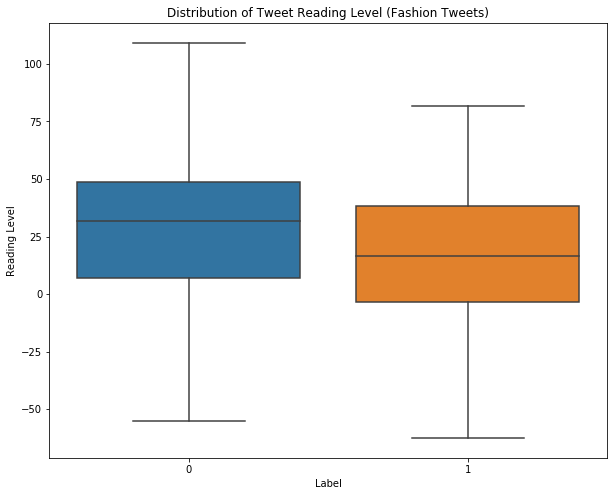

In [100]:
# Distribution of reading level in different labels (Flesch Reading Ease Score)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.flesch_reading_ease(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

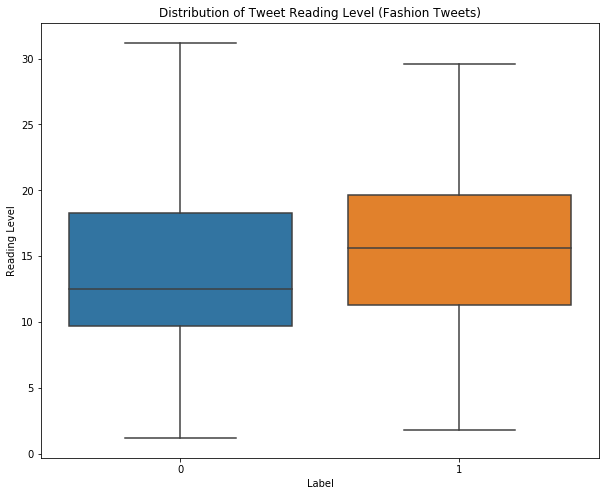

In [101]:
# Distribution of reading level in different labels (Fog Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.gunning_fog(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

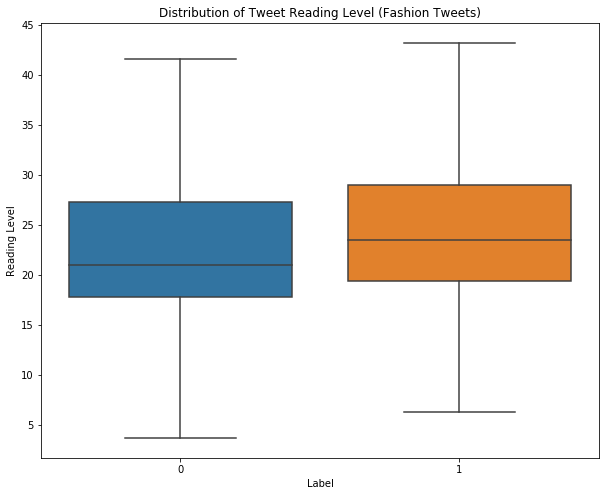

In [103]:
# Distribution of reading level in different labels (Coleman-Liau Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.coleman_liau_index(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

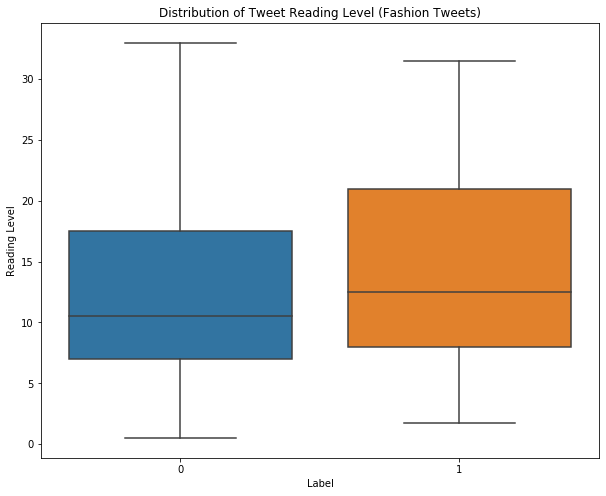

In [104]:
# Distribution of reading level in different labels (Linsear Write Formula)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.linsear_write_formula(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

## Fitness Tweets

In [105]:
# Load fitness tweets into a pandas DataFrame
fitness_df = pd.read_csv('fitness_tweets.csv')
fitness_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...
1,WhtIStheSCIENCE,Clinical Director #BCBA for @SpecialNeedsLA #A...,"Los Angeles, CA",1008,696,7214,2012-10-15 06:38:35,2020-10-05 15:34:07,1,RT @SpectrumSports8: Cone Flip Melee!! \n\n#do...
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...
3,CeciliaMaundu,"Broadcast journalist, Specialist in Gender Dig...",Nairobi,888,754,7282,2012-01-11 04:09:14,2020-10-05 15:34:00,4,RT @PollicyOrg: Register for our next hands-on...
4,LidiaSegundoCar,NaN,NaN,722,772,591,2019-04-09 00:48:01,2020-10-05 15:33:54,1,RT @petertamayo: Nada #cambia si tu no cambias...


In [106]:
# Find out total no of rows and columns
fitness_df.shape

(10000, 10)

In [107]:
# Count missing values
fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        10000 non-null  object
 1   user_desc        9113 non-null   object
 2   location         7244 non-null   object
 3   following        10000 non-null  int64 
 4   followers        10000 non-null  int64 
 5   totaltweets      10000 non-null  int64 
 6   user_createdts   10000 non-null  object
 7   tweet_createdts  10000 non-null  object
 8   retweet_count    10000 non-null  int64 
 9   text             10000 non-null  object
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [108]:
# Check for duplicate tweets 
duplicate_tweets_fitness = fitness_df.duplicated(keep='first').sum()
duplicate_tweets_fitness

1517

In [109]:
# drop duplicates
fitness_df = fitness_df.drop_duplicates()
len(fitness_df)

8483

In [110]:
# Check for % of retweets
fitness_df['text'].apply(lambda x: 'RT' in x[:3]).mean()

0.42873983260638926

In [111]:
# Drop the retweets
fitness_df = fitness_df[~fitness_df.text.str.startswith('RT')]
len(fitness_df)

4849

In [112]:
# defind a function to find all the hashtags in a tweet

def hashtag(text):
    return (set([str(i.lower()) for i in text.split() if i.startswith("#")]))

fitness_df['hashtags'] = fitness_df['text'].apply(hashtag)
fitness_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#wellness, #anuaggarwalfoundation, #staysafe,..."
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#insanepools, #workout, #rt, #lucaslagoons}"
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness}


In [113]:
# Count the hashtags per each tweets
fitness_df['num_hashtags'] = fitness_df['hashtags'].apply(len)
fitness_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#wellness, #anuaggarwalfoundation, #staysafe,...",15
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#insanepools, #workout, #rt, #lucaslagoons}",4
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1


In [114]:
# find the number of search hashtags (we used thsese tags to pull the tweet) in a tweet
fit_search_tags = ['#fitness', '#workout', '#gym', '#healthy', '#fitnessmotivation', '#fitnessmodel', '#healthylifestyle', '#fit', '#mtivation', '#wellness', '#lifestyle', '#mindbody', '#training', '#exercise', '#exercise', '#firnesslife', '#healthandfitness', '#exercisemotivation']


def search_hashtags(tags):
    t = 0
    for i in fit_search_tags:
        for j in tags:
            if i in j:
                t += 1
    return t

                
fitness_df['num_search_tags'] = fitness_df['hashtags'].apply(search_hashtags)
fitness_df.head()            

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#wellness, #anuaggarwalfoundation, #staysafe,...",15,1
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#insanepools, #workout, #rt, #lucaslagoons}",4,1
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1
9,KavitaRaoMD,Dr. Kavita Rao M.D. is a Gulf Coast internist ...,"St. Petersburg, FL",40,5,673,2014-12-19 18:06:56,2020-10-05 15:33:30,0,Love yourself enough to live a healthy lifesty...,"{#wellness, #health, #healthyliving}",3,2
11,Crystal_Price13,Just me - all day - everyday,"Panama City, FL",60,445,12936,2013-05-21 23:46:02,2020-10-05 15:33:25,0,I thought you might enjoy a 5 minute break wit...,"{#stopbreathethink, #healthylifestyle, #health...",6,4


In [115]:
# find the the number of tweets with no search hashtags
len(fitness_df[fitness_df.num_search_tags == 0])

10

In [116]:
# drop the tweets with no search hashtags
fitness_df = fitness_df[fitness_df.num_search_tags != 0]
len(fitness_df)

4839

In [117]:
# define a function to label the tweets based on the number of followers the user have
def label_func(followers):
    if followers > 30000:
        return 1
    else:
        return 0
fitness_df['label'] = fitness_df['followers'].apply(label_func)
fitness_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#wellness, #anuaggarwalfoundation, #staysafe,...",15,1,0
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#insanepools, #workout, #rt, #lucaslagoons}",4,1,0
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1,0
9,KavitaRaoMD,Dr. Kavita Rao M.D. is a Gulf Coast internist ...,"St. Petersburg, FL",40,5,673,2014-12-19 18:06:56,2020-10-05 15:33:30,0,Love yourself enough to live a healthy lifesty...,"{#wellness, #health, #healthyliving}",3,2,0
11,Crystal_Price13,Just me - all day - everyday,"Panama City, FL",60,445,12936,2013-05-21 23:46:02,2020-10-05 15:33:25,0,I thought you might enjoy a 5 minute break wit...,"{#stopbreathethink, #healthylifestyle, #health...",6,4,0


In [119]:
# counts the number of tweets in each label
followers_count_fit = fitness_df['label'].value_counts().sort_index()
followers_count_fit

0    4668
1     171
Name: label, dtype: int64

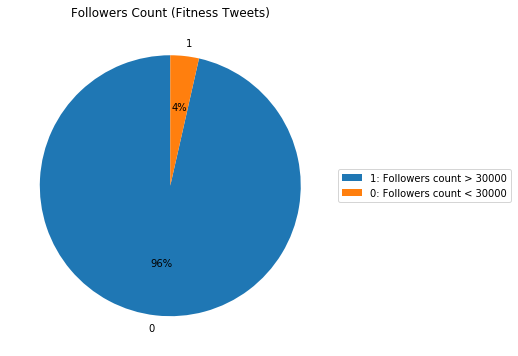

In [120]:
# Pie plot to show the percentage of tweets in each label
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
plt.pie(followers_count_fit, labels=[0,1],startangle=90, autopct='%.0f%%')

ax.legend(["1: Followers count > 30000", "0: Followers count < 30000"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Followers Count (Fitness Tweets)")

plt.show()

### Distribution of Word Count, % of caps, number of hashtags in different labels (followers count category)

In [123]:
# Distribution of tweet length in different labels (followers category)

fitness_df['tweet_length'] = fitness_df['text'].apply(lambda x: len(x.split())) # tweet length
fitness_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#wellness, #anuaggarwalfoundation, #staysafe,...",15,1,0,36
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#insanepools, #workout, #rt, #lucaslagoons}",4,1,0,27


In [124]:
# user with higest number of tweets on fashion
user_fit = fitness_df['user_name'].value_counts()
user_fit.head(10)

EarthWizardInfo    25
IAM__Network       18
buzbuzhd           18
LevaDuell          17
StanleyEpstein     15
HOTorganics        14
kkidsboyssoccer    14
Bariquins          14
gofitfinder        11
HOODZRADIO         11
Name: user_name, dtype: int64

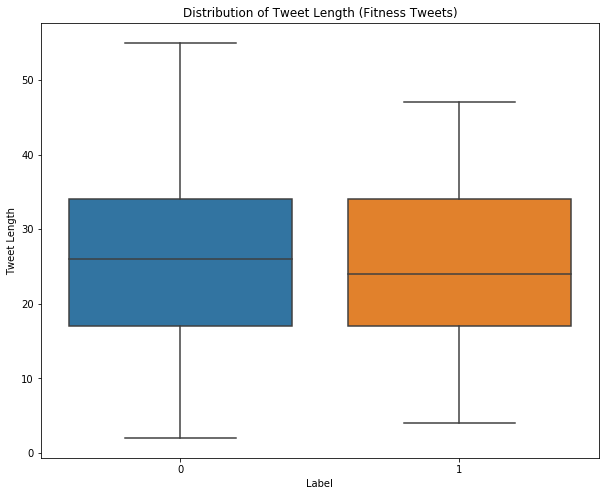

In [125]:
# tweet length distribution at different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'tweet_length', data = fitness_df, showfliers=False).set(xlabel= 'Label', ylabel='Tweet Length', title='Distribution of Tweet Length (Fitness Tweets)')
plt.show()

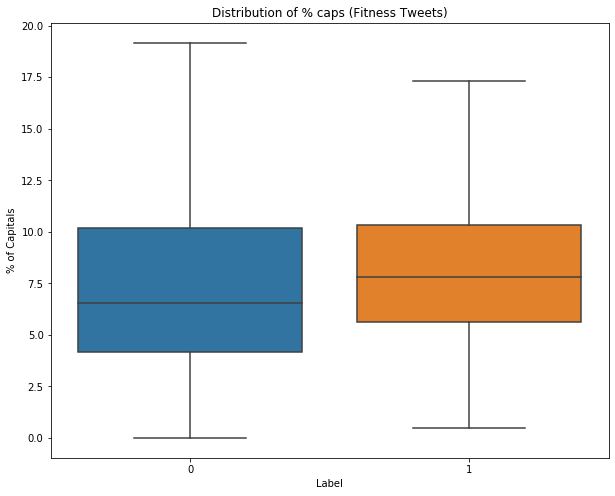

In [126]:
# define a function to get % of caps in a tweet
def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100

# Distribution of % of Caps in different followers count (labels)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(caps), data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='% of Capitals', title='Distribution of % caps (Fitness Tweets)')
plt.show()

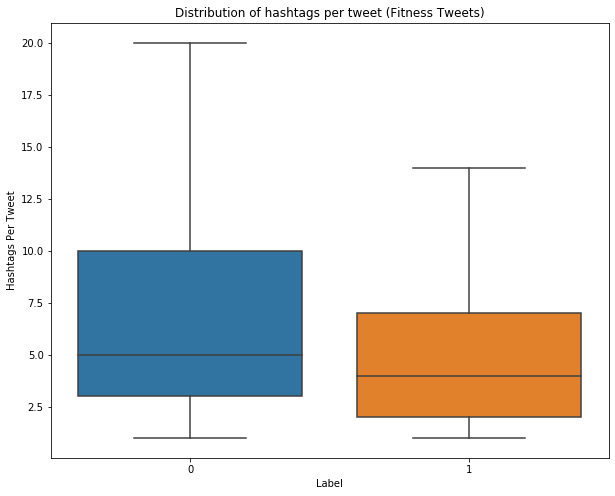

In [127]:
# Distribution of number of hashtags in different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'num_hashtags', data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='Hashtags Per Tweet', title='Distribution of hashtags per tweet (Fitness Tweets)')
plt.show()

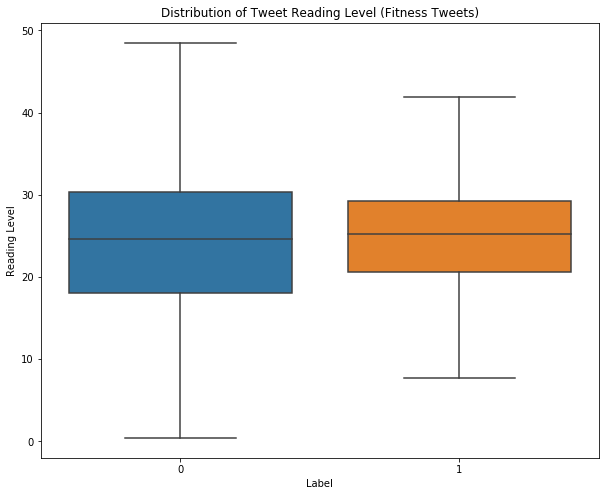

In [128]:
# Distribution of reading level in different labels (Automated Readability Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.automated_readability_index(x)), data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

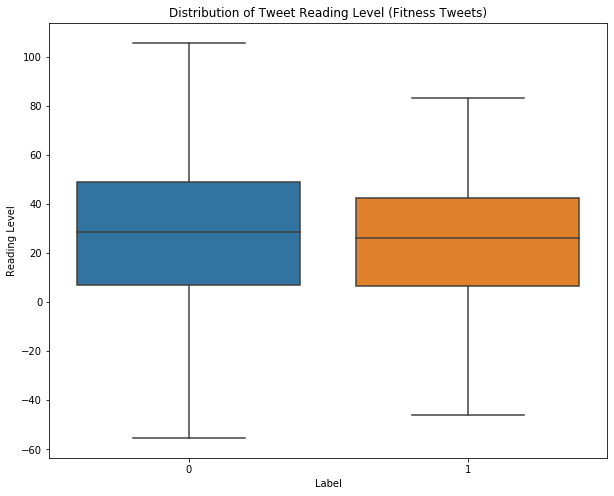

In [129]:
# Distribution of reading level in different labels (Flesch Reading Ease Score)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.flesch_reading_ease(x)), data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

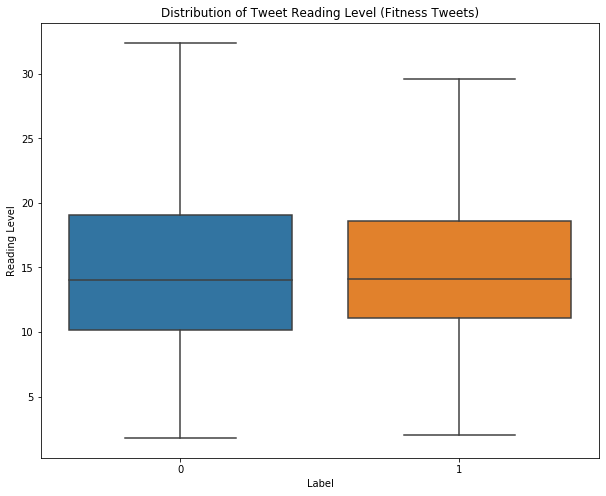

In [130]:
# Distribution of reading level in different labels (Fog Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.gunning_fog(x)), data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

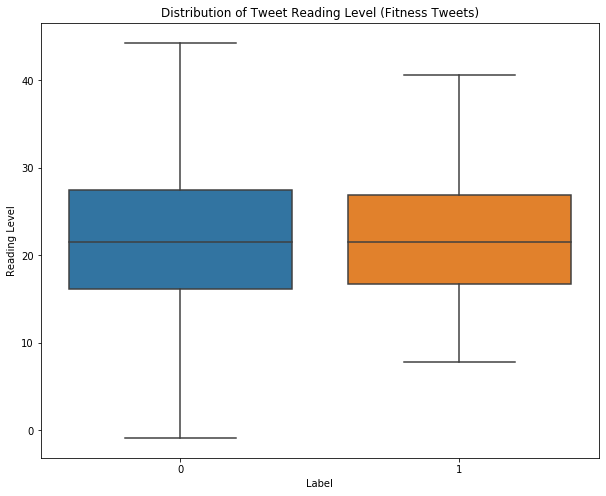

In [131]:
# Distribution of reading level in different labels (Coleman-Liau Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.coleman_liau_index(x)), data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

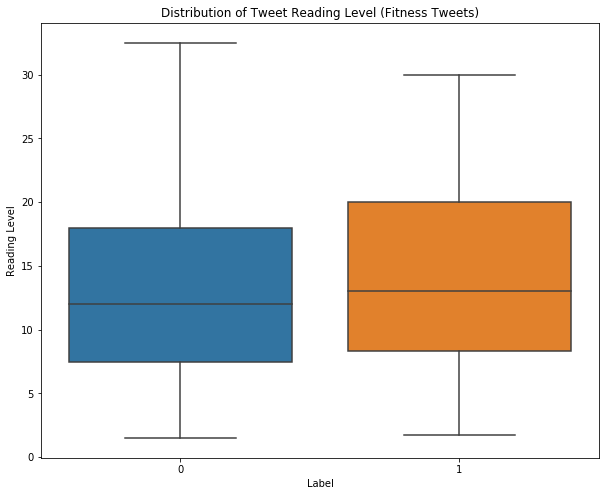

In [132]:
# Distribution of reading level in different labels (Linsear Write Formula)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.linsear_write_formula(x)), data = fitness_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

In [ ]:
# Load fitness tweets into a pandas DataFrame
fitness_df = pd.read_csv('fitness_tweets.csv')
fitness_df.head()

# Find out total no of rows and columns
fashion_df.shape
# Count missing values
fashion_df.info()

# Check for duplicate tweets 
duplicate_tweets_fashion = fashion_df.duplicated(keep='first').sum()
duplicate_tweets_fashion

# drop duplicates
fashion_df = fashion_df.drop_duplicates()
len(fashion_df)

# Check for % of retweets
fashion_df['text'].apply(lambda x: 'RT' in x[:3]).mean()

# Drop the retweets
fashion_df = fashion_df[~fashion_df.text.str.startswith('RT')]
len(fashion_df)

# defind a function to find all the hashtags in a tweet

def hashtag(text):
    return (set([str(i.lower()) for i in text.split() if i.startswith("#")]))

fashion_df['hashtags'] = fashion_df['text'].apply(hashtag)
fashion_df.head(3)

# Count the hashtags per each tweets
fashion_df['num_hashtags'] = fashion_df['hashtags'].apply(len)
fashion_df.head(3)

# find the number of search hashtags (we used thsese tags to pull the tweet) in a tweet
search_tags = ['#fashion', '#style',  '#design',  '#beauty',  '#fashiontrends',  '#fashionblogger', '#fashionstyle',  '#fashionweek',  '#fashionstylist',  '#fashionmodel' , '#fasionista' , '#model',  '#fashionlover',  '#womenfashion', '#menfashion']

def search_hashtags(tags):
    t = 0
    for i in search_tags:
        for j in tags:
            if i in j:
                t += 1
    return t

                
fashion_df['num_search_tags'] = fashion_df['hashtags'].apply(search_hashtags)
fashion_df.head()            

# find the the number of tweets with no search hashtags
len(fashion_df[fashion_df.num_search_tags == 0])

# drop the tweets with no search hashtags
fashion_df = fashion_df[fashion_df.num_search_tags != 0]
len(fashion_df)

# define a function to label the tweets based on the number of followers the user have
def label_func(followers):
    if followers > 30000:
        return 1
    else:
        return 0
fashion_df['label'] = fashion_df['followers'].apply(label_func)
fashion_df.head()

# counts the number of tweets in each label
followers_count = fashion_df['label'].value_counts().sort_index()
followers_count

# Pie plot to show the percentage of tweets in each label
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
plt.pie(followers_count, labels=[0,1],startangle=90, autopct='%.0f%%')

ax.legend(["1: Followers count > 30000", "0: Followers count < 30000"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Followers count")

plt.show()

In [ ]:
### Distribution of Word Count, % of caps, number of hashtags in different labels (followers count category)

# Distribution of tweet length in different labels (followers category)

fashion_df['tweet_length'] = fashion_df['text'].apply(lambda x: len(x.split())) # tweet length
fashion_df.head(2)

# user with higest number of tweets on fashion
user = fashion_df['user_name'].value_counts()
user.head(10)

# tweet length distribution at different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'tweet_length', data = fashion_df, showfliers=False).set(xlabel= 'Label', ylabel='Tweet Length', title='Distribution of Tweet Length (Fashion Tweets)')
plt.show()


# define a function to get % of caps in a tweet
def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100

# Distribution of % of Caps in different followers count (labels)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(caps), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='% of Capitals', title='Distribution of % caps (Fashion Tweets)')
plt.show()

# Distribution of number of hashtags in different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'num_hashtags', data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Hashtags Per Tweet', title='Distribution of hashtags per tweet (Fashion Tweets)')
plt.show()


fashion_df['reading_level (ARI)'] = fashion_df['text'].apply(lambda x: textstat.automated_readability_index(x))
fashion_df.head()

# Distribution of reading level in different labels (Automated Readability Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.automated_readability_index(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

# Distribution of reading level in different labels (Flesch Reading Ease Score)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.flesch_reading_ease(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

# Distribution of reading level in different labels (Fog Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.gunning_fog(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

# Distribution of reading level in different labels (Coleman-Liau Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.coleman_liau_index(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

# Distribution of reading level in different labels (Linsear Write Formula)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.linsear_write_formula(x)), data = fashion_df, showfliers=False).set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

